## A Quick Simulated Introduction to the specification_curve Library

#### 21st June 2021

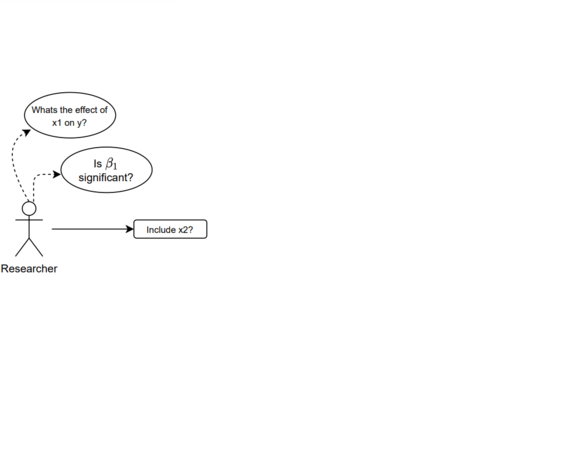

In [1]:
from IPython.display import Image
Image(open("forking_paths.gif",'rb').read())

Lets first load in our necessary dependancies; [numpy](https://numpy.org/) for creating some random variables, [pandas](https://pandas.pydata.org/) for data wrangling, [statsmodels](https://www.statsmodels.org/stable/index.html) to build some basic OLS models, and the all important [specification_curve](https://specification-curve.readthedocs.io/en/latest/readme.html) library;

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from specification_curve import specification_curve as specy

To make sure everything is reproducible, lets determine a definitive number of samples, and a [seed](https://en.wikipedia.org/wiki/Random_seed);

In [3]:
n_samples = 300
np.random.seed(1342)

Lets now define some random variables. The first three are all random floats in the half-open interval [0.0, 1.0).

In [4]:
x_1 = np.random.random(size=n_samples)
x_2 = np.random.random(size=n_samples)
x_3 = np.random.random(size=n_samples)

and the next two are dichotomous binary variables;

In [5]:
x_4 = np.random.randint(2, size=n_samples)
x_5 = np.random.randint(2, size=n_samples)

Lets define our y-variable to be a simple function of these, with a degree of noise;

In [6]:
y = (0.5*x_1 + 0.1*x_2 + 0.5*x_3 + x_4*0.6 + x_4*0.9 + x_5*0.4
     + 3*np.random.randn(n_samples))

Turn these into a dataframe, where the first list is our list of variables, and the second is our list of variable names;

In [7]:
df = pd.DataFrame([x_1, x_2, x_3, x_4, x_5, y],
                  ['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'y']).T

And then set the latter two variables (x_4_ and x_5) as categorical pandas columns;

In [8]:
df['x_4'] = df['x_4'].astype('category')
df['x_5'] = df['x_5'].astype('category')

If we ran a simple OLS model with x_1, x_2 and x_3, we might think that our x_1 variable is statistically significant!

In [9]:
X = df[['x_1', 'x_2', 'x_3']]
ols_reg1 = sm.OLS(df[['y']], X.astype(float)).fit()
ols_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.210
Model:                            OLS   Adj. R-squared (uncentered):              0.202
Method:                 Least Squares   F-statistic:                              26.30
Date:                Wed, 16 Jun 2021   Prob (F-statistic):                    4.09e-15
Time:                        16:04:38   Log-Likelihood:                         -749.34
No. Observations:                 300   AIC:                                      1505.
Df Residuals:                     297   BIC:                                      1516.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x_1            1.3314      0.494      2.694      0.007       0.359       2.304
x_2            1.6684      0.467      3.573      0.000       0.750       2.587
x_3           -0.2838      0.491     -0.578      0.564      -1.250       0.683
==============================================================================
Omnibus:                        1.342   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                1.079
Skew:                          -0.124   Prob(JB):                        0.583
Kurtosis:                       3.157   Cond. No.                         3.19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

But what about when we include x_4 and x_5?

In [10]:
X = df[['x_1', 'x_2', 'x_3', 'x_4', 'x_5']]
ols_reg2 = sm.OLS(df[['y']], X.astype(float)).fit()
ols_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.262
Model:                            OLS   Adj. R-squared (uncentered):              0.249
Method:                 Least Squares   F-statistic:                              20.92
Date:                Wed, 16 Jun 2021   Prob (F-statistic):                    6.83e-18
Time:                        16:04:38   Log-Likelihood:                         -739.16
No. Observations:                 300   AIC:                                      1488.
Df Residuals:                     295   BIC:                                      1507.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x_1            0.5475      0.511      1.071      0.285      -0.459       1.554
x_2            1.1525      0.473      2.438      0.015       0.222       2.083
x_3           -0.7013      0.489     -1.434      0.153      -1.664       0.261
x_4            1.3581      0.318      4.269      0.000       0.732       1.984
x_5            0.4174      0.321      1.299      0.195      -0.215       1.050
==============================================================================
Omnibus:                        1.054   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.796
Skew:                          -0.019   Prob(JB):                        0.672
Kurtosis:                       3.249   Cond. No.                         4.27
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Introducing [Specification Curve Analysis](https://www.nature.com/articles/s41562-020-0912-z)! A great way to visualise all combinations of variables. They can also be expanded to include things like deterministic variables, and transformation choices!

Fit complete


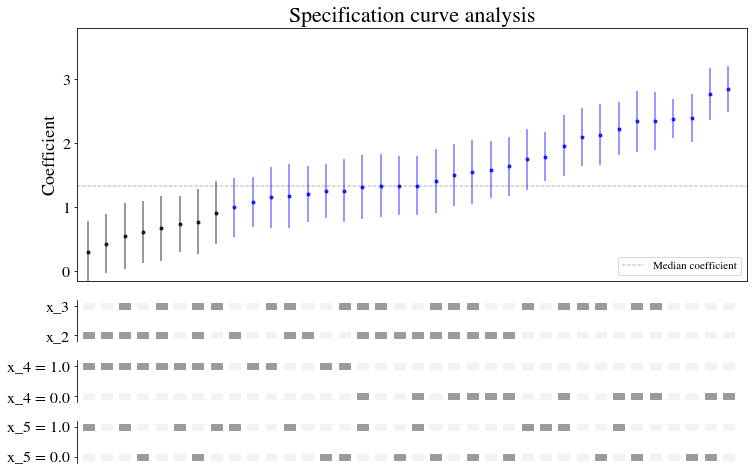

In [11]:
sc = specy.SpecificationCurve(df, 'y', 'x_1', ['x_2', 'x_3', 'x_4', 'x_5'],
                              cat_expand=['x_4', 'x_5'])
sc.fit()
sc.plot()